https://www.kaggle.com/code/jaime44/movie-recommendation-with-collaborative-filtering/edit

In [1]:
import os
# Comprueba si el código se está ejecutando en Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

path_absolute = ''
if IN_COLAB:
    print("El código se está ejecutando en Google Colab.")
    from google.colab import drive

    drive.mount('/content/drive')
    path_absolute = '/content/drive/Othercomputers/Mi_portátil/TFM/WorkSpace/'

    # Cambia al directorio de tu carpeta en Google Drive
    os.chdir(path_absolute)

    # Lista los archivos y carpetas en el directorio actual
    contenido_carpeta = os.listdir(path_absolute)
    print("Contenido de la carpeta en Google Drive:")
    print(contenido_carpeta)
else:
    print("El código se está ejecutando en un entorno local.")
    path_absolute = os.getcwd().replace("\\", "/")

datasets_path = "/datasets/"
path_absolute = path_absolute+datasets_path

El código se está ejecutando en un entorno local.


In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1{
    text-align: center;
    background-color: blue;
    padding: 20px;
    margin: 0;
    color: white;
    font-family: ariel;
    border-radius: 80px
}

h2,h3{
    text-align: center;
    border-style: solid;
    border-width: 3px;
    padding: 12px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: gold;
}

body, p {
    font-family: ariel;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: ariel;
    color: purple;
}
</style>
""")

In [3]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#8F003C','#eb3446','Tourney','Smokum',45,10
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+""";</style>
    <h4 class='font-effect-3d-float' style='font-family:"""+\
    font+"""; color:"""+fontcolor+"""; font-size:"""+\
    str(fontsize)+"""px;'>%s</h4>"""%string))
    
    
dhtml('🔥💥 Movie Recommendation System 💥🔥' )

<small>**Item to item based collaborative filtering** is the principle being applied. It involves finding similar movies based on inputs from multiple users in the form of ratings.

Collaborative Filtering is a technique or a method to predict a user’s taste and find the items that a user might prefer on the basis of information collected from various other users having similar tastes or preferences. It takes into consideration the basic fact that if person X and person Y have a certain reaction for some items then they might have the same opinion for other items too.</small>

**El principio aplicado es el filtrado colaborativo entre elementos. Consiste en encontrar películas similares a partir de las aportaciones de varios usuarios en forma de valoraciones.

El filtrado colaborativo es una técnica o método para predecir los gustos de un usuario y encontrar los artículos que podría preferir basándose en la información recabada de otros usuarios con gustos o preferencias similares. Tiene en cuenta el hecho básico de que si la persona X y la persona Y tienen una determinada reacción ante algunos artículos, también pueden tener la misma opinión sobre otros artículos.

## Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Datasets

In [6]:
movies = pd.read_csv(path_absolute+"movies.csv")
ratings = pd.read_csv(path_absolute+"ratings.csv")

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [9]:
data = pd.pivot(index = 'movieId',columns = 'userId', data = ratings,values ='rating')
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,4.0,NaN,...,NaN,4.0,3.5,NaN,NaN,NaN,NaN,NaN,4.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
numberOf_user_voted_for_movie = pd.DataFrame(ratings.groupby('movieId')['rating'].agg('count'))
numberOf_user_voted_for_movie.reset_index(level = 0,inplace = True)
numberOf_user_voted_for_movie.head()

,movieId,rating
0,1,247
1,2,107
2,3,59
3,4,13
4,5,56


In [11]:
data.shape

(9066, 671)

In [12]:
numberOf_movies_voted_by_user = pd.DataFrame(ratings.groupby('userId')['rating'].agg('count'))     
numberOf_movies_voted_by_user.reset_index(level = 0,inplace = True)
numberOf_movies_voted_by_user.head()

,userId,rating
0,1,20
1,2,76
2,3,51
3,4,204
4,5,100


In [13]:
data.fillna(0,inplace = True)
data.head()

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,0.0,...,0.0,4.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
numberOf_user_voted_for_movie.describe()

,movieId,rating
count,9066.000000,9066.000000
mean,30772.100044,11.030664
std,40418.420801,24.050800
min,1.000000,1.000000
25%,2829.750000,1.000000
50%,6248.000000,3.000000
75%,55827.500000,9.000000
max,163949.000000,341.000000


In [15]:
numberOf_movies_voted_by_user.describe()

,userId,rating
count,671.000000,671.000000
mean,336.000000,149.037258
std,193.845299,231.226948
min,1.000000,20.000000
25%,168.500000,37.000000
50%,336.000000,71.000000
75%,503.500000,161.000000
max,671.000000,2391.000000


### Visualizing Thresholds set to remove noise from data

Text(0, 0.5, 'Number Of Users Voted for Movie')

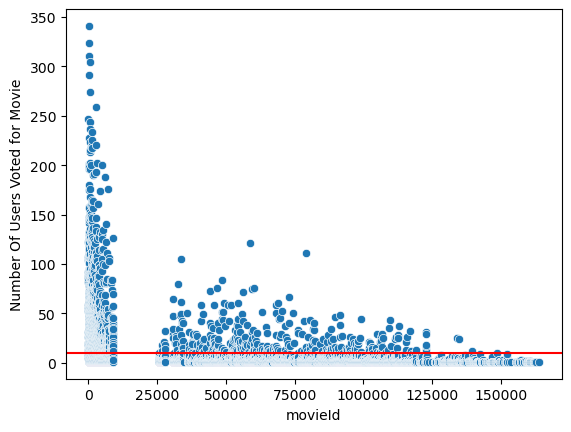

In [16]:
plt.figure()
ax = sns.scatterplot(y = 'rating', x = 'movieId', data = numberOf_user_voted_for_movie)
plt.axhline(y=10,color='r')
plt.ylabel('Number Of Users Voted for Movie')

Text(0, 0.5, 'Number Of Movies rated by user')

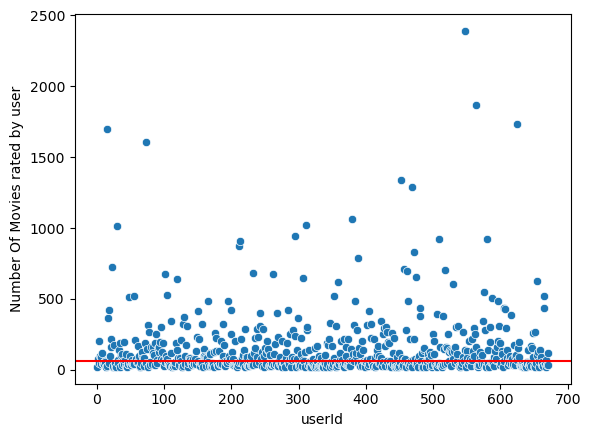

In [17]:
plt.figure()
ax = sns.scatterplot(y = 'rating', x = 'userId', data = numberOf_movies_voted_by_user)
plt.axhline(y=60,color='r')
plt.ylabel('Number Of Movies rated by user')

In [18]:
data_final = data.loc[numberOf_user_voted_for_movie[numberOf_user_voted_for_movie['rating'] > 10]['movieId'],:]
data_final = data_final.loc[:,numberOf_movies_voted_by_user[numberOf_movies_voted_by_user['rating'] > 60]['userId']]
data_final.shape

(2083, 371)

In [19]:
data_final

userId,2,4,5,7,8,12,15,17,19,20,...,652,654,655,656,659,660,664,665,667,671
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,3.0,3.5,...,0.0,5.0,0.0,0.0,0.0,2.5,3.5,0.0,0.0,5.0
2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122900,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0
122904,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
134130,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dealing with sparsity 

In [20]:
from scipy.sparse import csr_matrix
csr_data = csr_matrix(data_final.values)
data_final.reset_index(inplace=True)

In [21]:
data_final.head()

userId,movieId,2,4,5,7,8,12,15,17,19,...,652,654,655,656,659,660,664,665,667,671
0,1,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,3.0,...,0.0,5.0,0.0,0.0,0.0,2.5,3.5,0.0,0.0,5.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,...,0.0,3.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
2,3,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0


In [22]:
# trying out methods to get recommended indices from knn output
# from sklearn.neighbors import NearestNeighbors
# knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
# knn.fit(csr_data)
# movie_list = movies[movies['title'].str.contains('Iron Man')]
# movie_idx= movie_list.iloc[0]['movieId'] #movieId
# movie_idx = data_final[data_final['movieId'] == movie_idx].index[0] #userId acc to movieId
# distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=11) #returns distances from ref and indices(userId)
# indices
# indices.squeeze() to reduce dimension of array so that it can zipped with dimensions.squeeze()
# sorted(list(zip(indices.squeeze(),distances.squeeze())),key = lambda x: x[1])[1::1]

## The Magic

In [23]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
knn.fit(csr_data)
def get_movie_recommendation(movie_name):
    n= 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId'] #movieId
        movie_idx = data_final[data_final['movieId'] == movie_idx].index[0] #userId acc to movieId
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze(),distances.squeeze())),key=lambda x: x[1])[1::1]
        recommend = []
        recommend2 = []
        for val in rec_movie_indices:
            movie_idx = data_final.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend.append(movies.iloc[idx]['title'].values[0])
            recommend2.append(val[1])         
        df1 = pd.DataFrame(recommend)
        df2 = pd.DataFrame(recommend2)
        df = pd.concat([df1,df2],axis = 'columns')
        df.columns = ['Title','Distance']
        df.set_index('Distance',inplace = True)
        return df
    else:
        return "No movies found. Please check your input"


## Test / Run the Recommendation System

In [24]:
# n = input()
# get_movie_recommendation(n.title())
get_movie_recommendation('Iron Man')

,Title
Distance,
0.186230,"Dark Knight, The (2008)"
0.298121,Star Trek (2009)
0.319867,Batman Begins (2005)
0.329733,Avatar (2009)
0.347826,Guardians of the Galaxy (2014)
0.354259,"Avengers, The (2012)"
0.357568,300 (2007)
0.369085,WALL·E (2008)
0.370270,Inception (2010)
